In [1]:
import pandas as pd
import numpy as np 
import matplotlib as npl
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
%matplotlib inline
#-------------------------------------------#
from scipy.stats import zscore
import seaborn  as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')


#--------------#
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('song_data.csv',encoding='utf-8',low_memory=False,index_col=False,on_bad_lines="skip")
df.head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [4]:
df.shape

(18835, 15)

In [5]:
df.dropna()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [6]:
df.shape

(18835, 15)

In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
df.shape

(14926, 15)

In [8]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [9]:
df['song_duration_min'] = (df['song_duration_ms'] / 1000 / 60).round(2)

In [10]:
X = df.drop(columns=['song_name']) 
X = sm.add_constant(X) 
vif_data = pd.DataFrame() 
vif_data["variable"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

             variable            VIF
0               const     294.294471
1     song_popularity       1.023974
2    song_duration_ms  132601.438613
3        acousticness       2.042427
4        danceability       1.427900
5              energy       3.885695
6    instrumentalness       1.271206
7                 key       1.033479
8            liveness       1.058847
9            loudness       3.027886
10         audio_mode       1.059778
11        speechiness       1.094666
12              tempo       1.072171
13     time_signature       1.044179
14      audio_valence       1.419129
15  song_duration_min  132601.224670


In [11]:
df = df.drop(columns=['song_duration_ms'])
df = df.drop(columns=['loudness'])

X = df.drop(columns=['song_name']) 
X = sm.add_constant(X) 
vif_data = pd.DataFrame() 
vif_data["variable"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

             variable         VIF
0               const  248.847822
1     song_popularity    1.021617
2        acousticness    2.040157
3        danceability    1.363543
4              energy    2.259796
5    instrumentalness    1.096862
6                 key    1.033375
7            liveness    1.058570
8          audio_mode    1.058854
9         speechiness    1.092347
10              tempo    1.070774
11     time_signature    1.042668
12      audio_valence    1.372785
13  song_duration_min    1.038469


In [12]:
print("Hay NaN:") 
print(df.isna().sum())

Hay NaN:
song_name            0
song_popularity      0
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
audio_mode           0
speechiness          0
tempo                0
time_signature       0
audio_valence        0
song_duration_min    0
dtype: int64


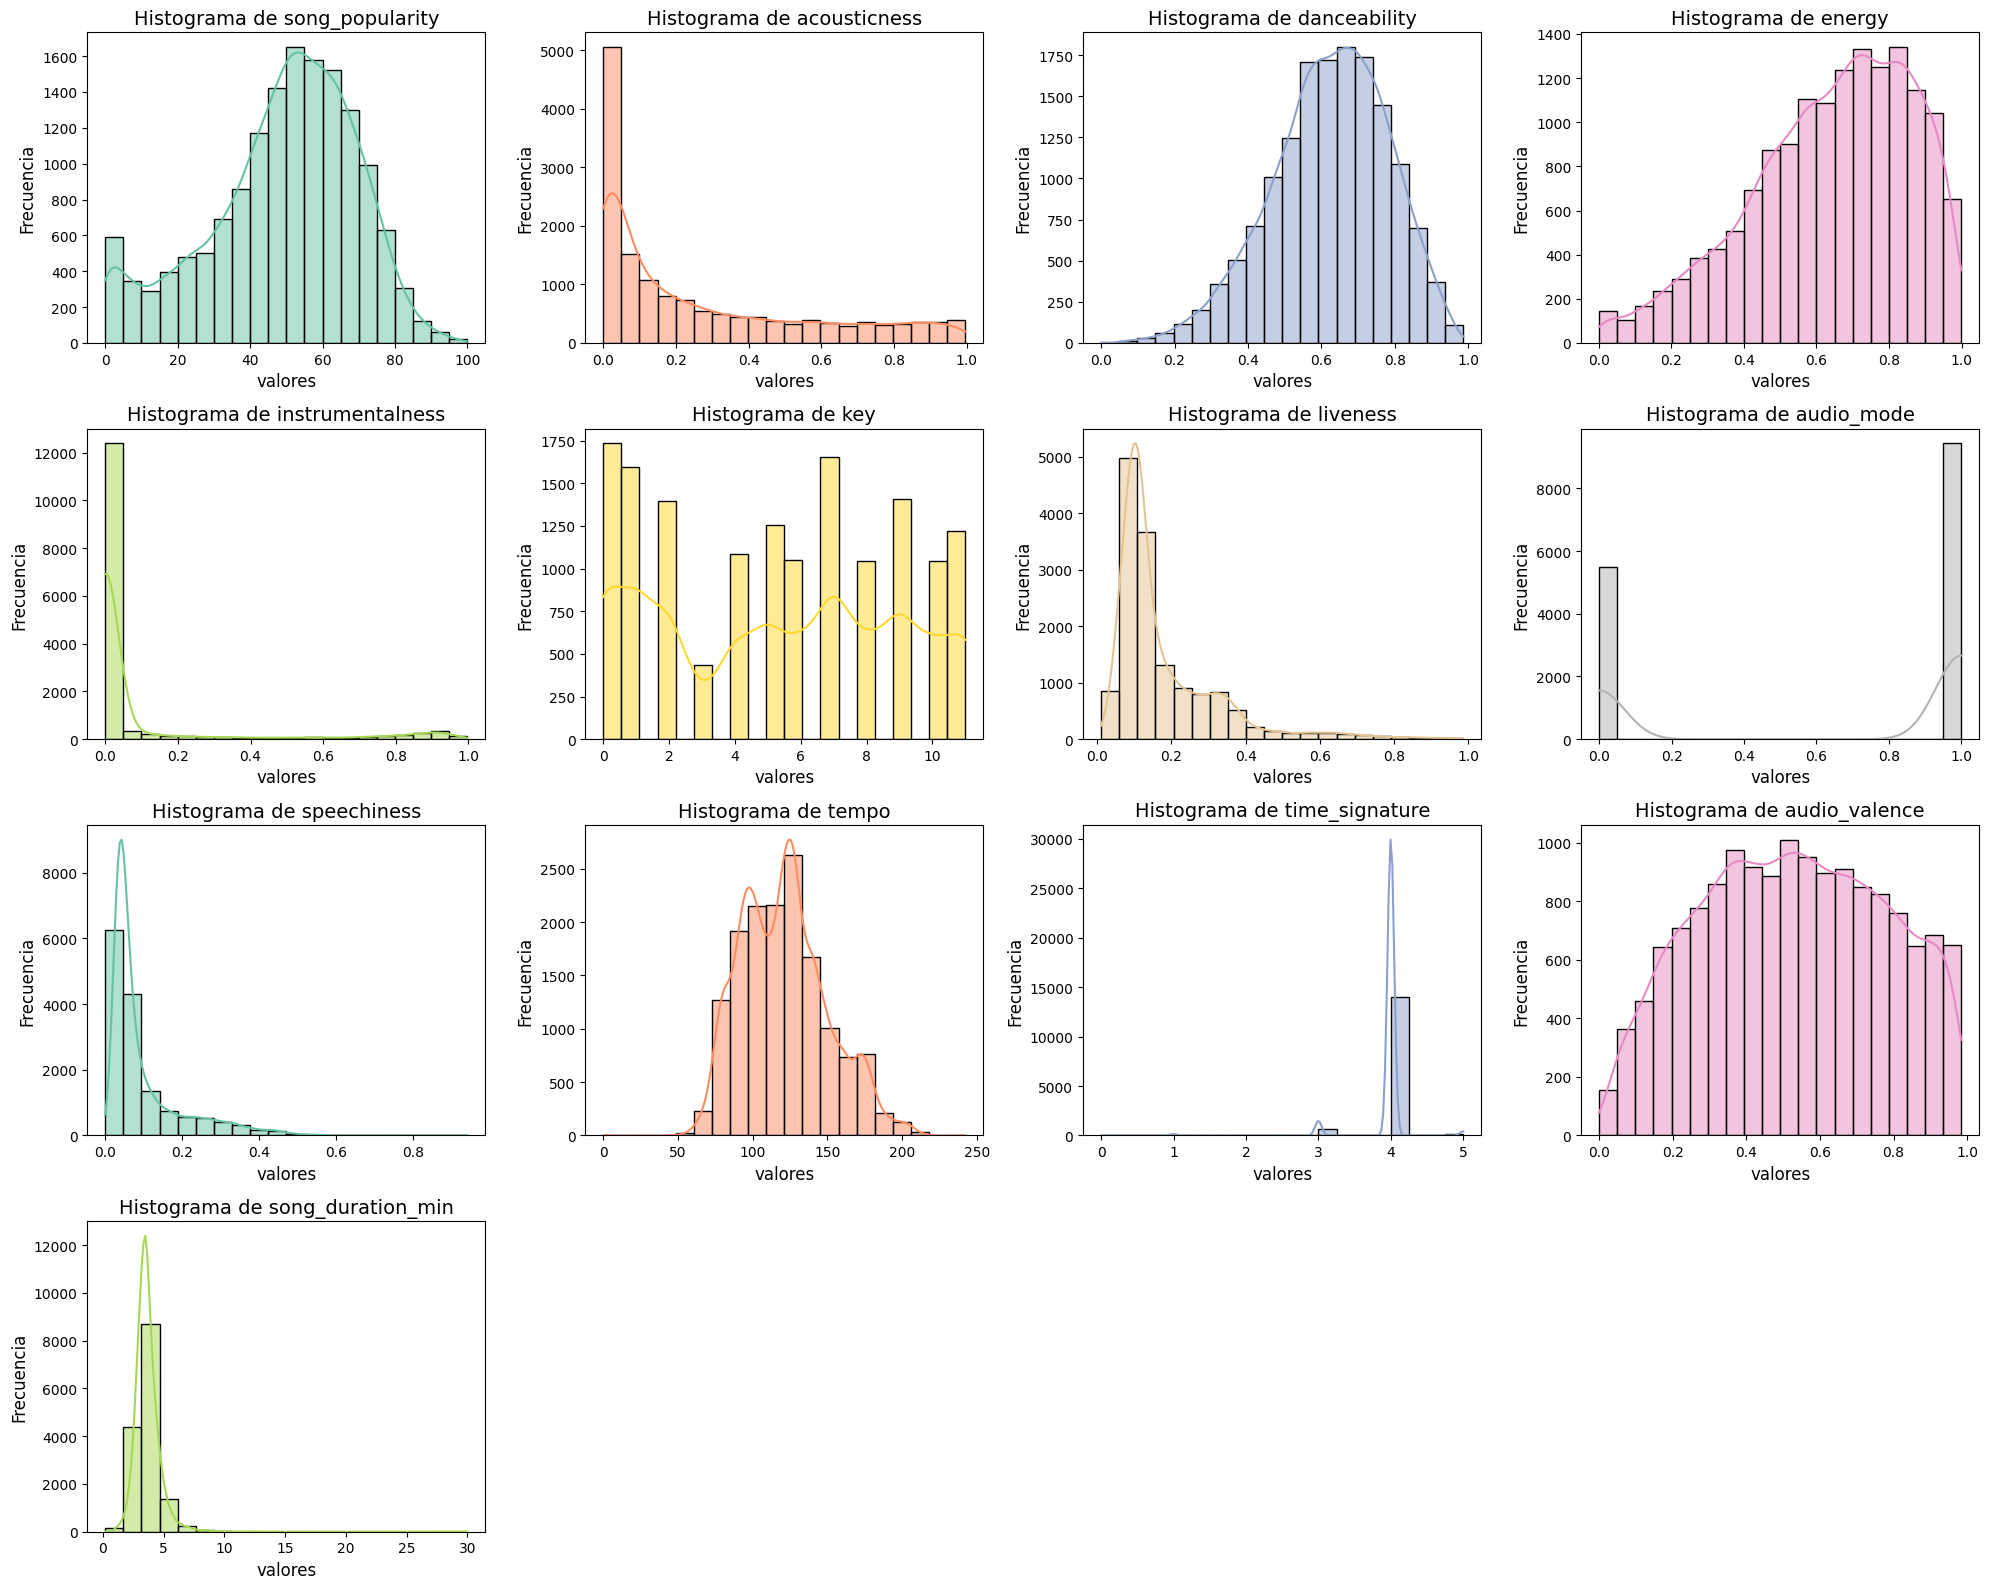

In [13]:
df_numerico= df.select_dtypes(include='number')

# Configurar tamaño de los gráficos
num_vars= len(df_numerico.columns)
cols=4
rows= (num_vars // cols) + (num_vars % cols > 0 )

plt.figure(figsize=(20, rows * 4))

# Usar una paleta de colores
paleta= sns.color_palette("Set2", num_vars)

# Crear un histograma por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_numerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)
    plt.title(f'Histograma de {columna}', fontsize=14)
    plt.xlabel('valores', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

# Ajuste de espacio y mostrar gráfico
plt.tight_layout()
plt.show()

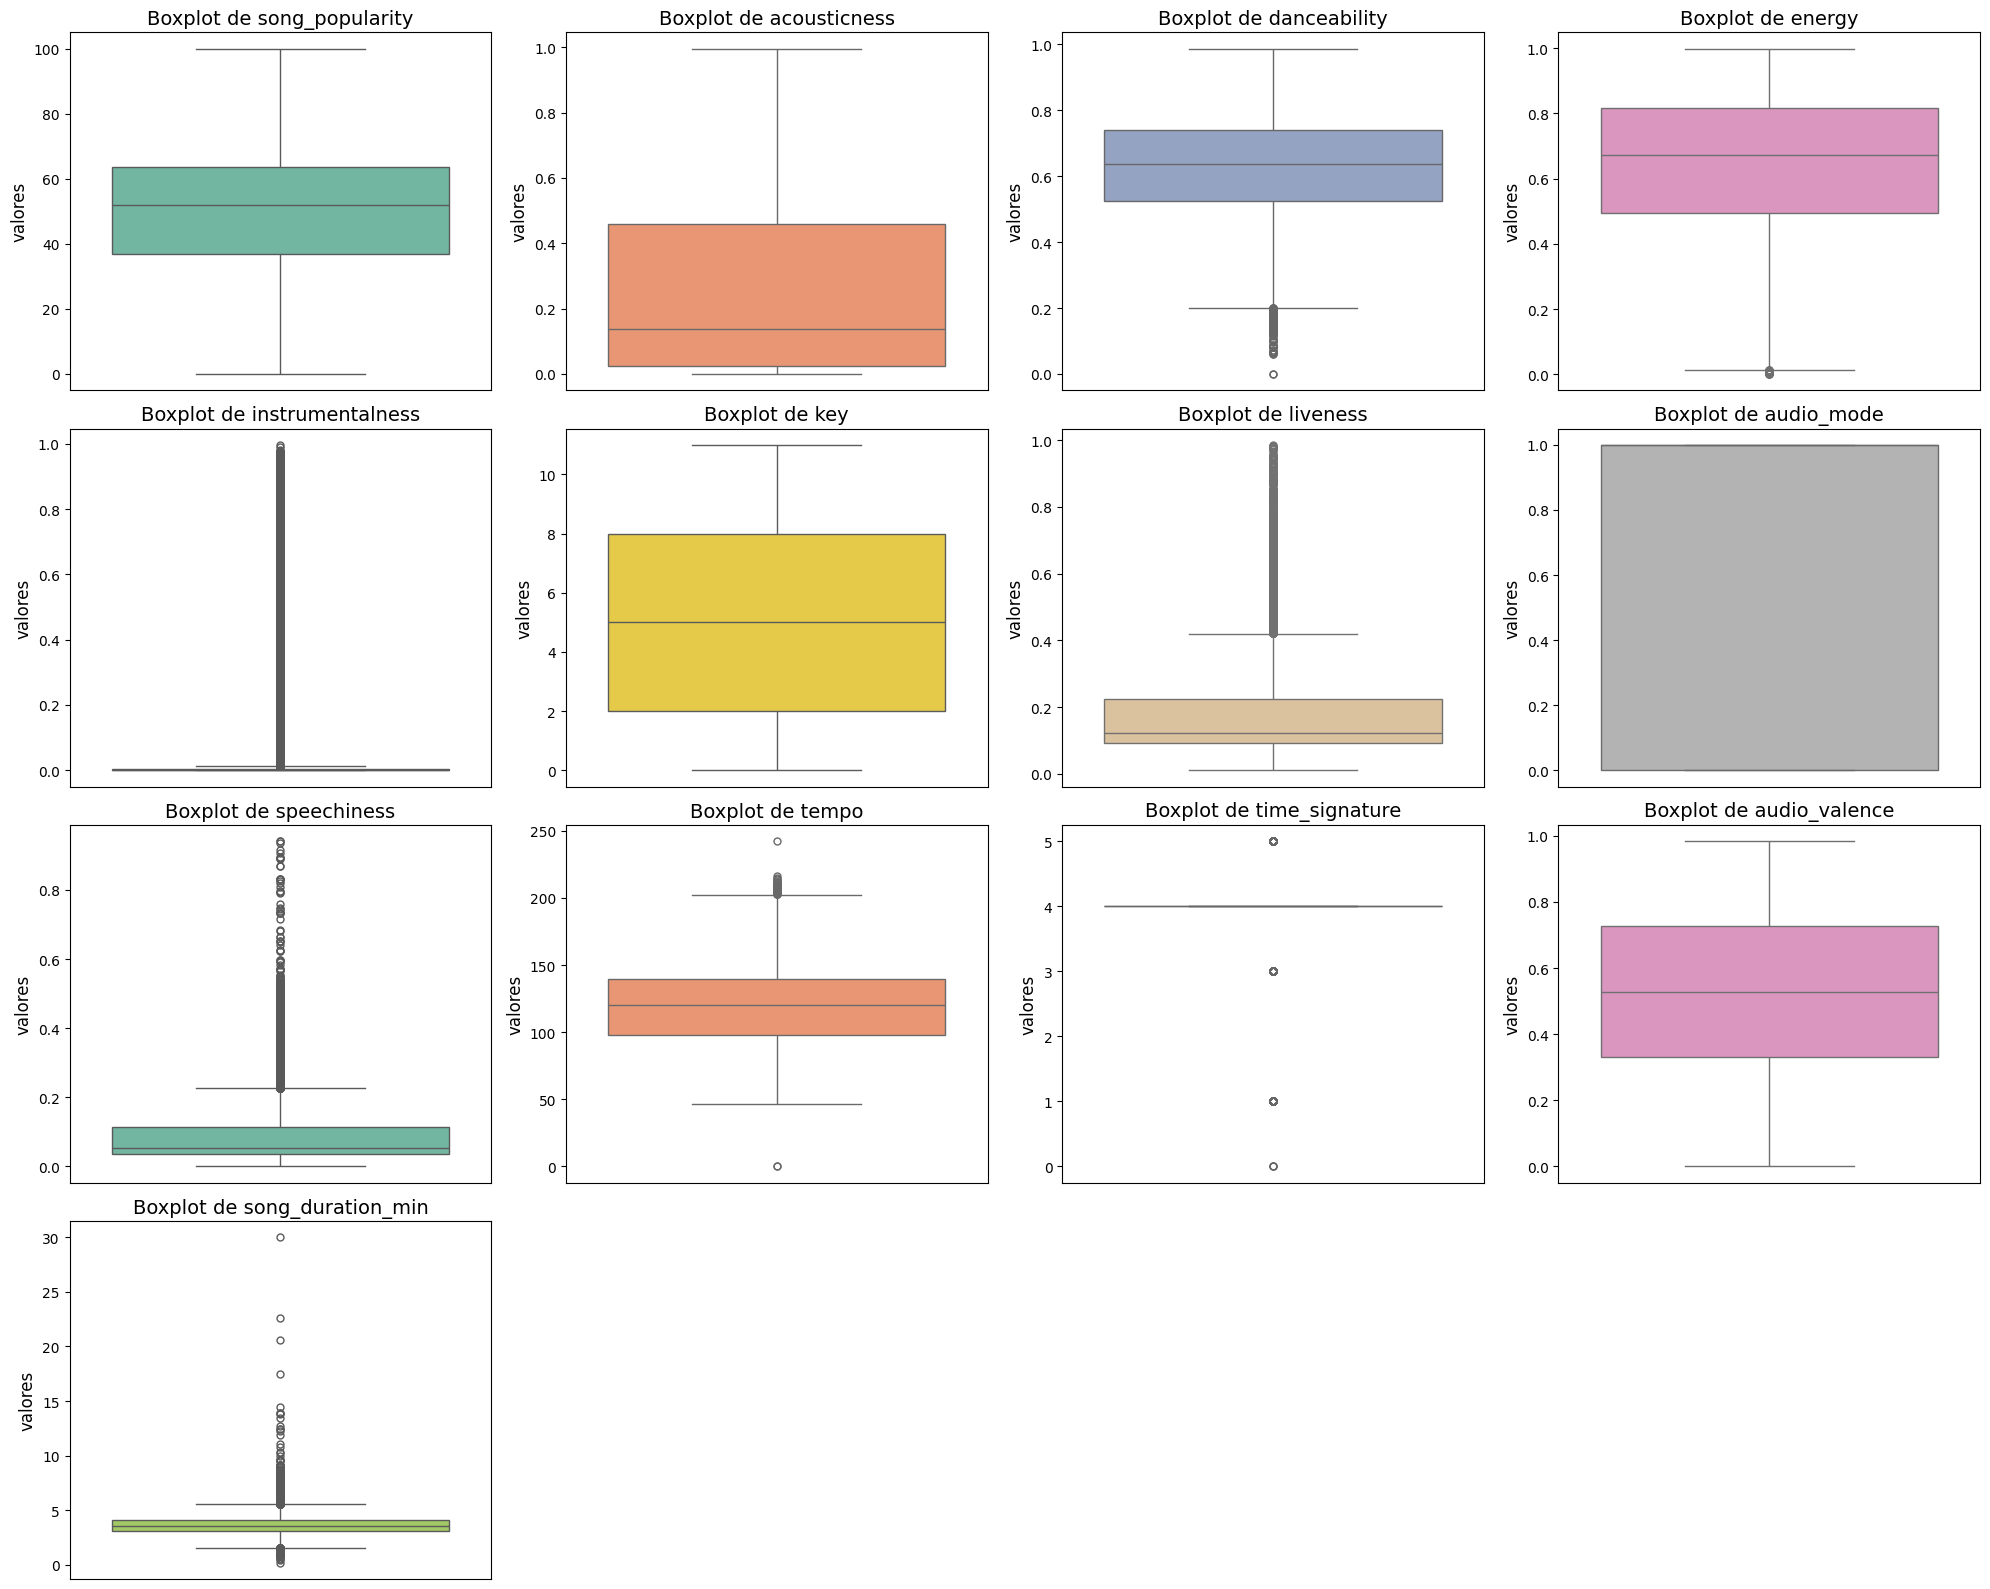

In [14]:
num_vars= len(df_numerico.columns)
cols=4
rows= (num_vars // cols) + (num_vars % cols > 0 )

plt.figure(figsize=(20, rows * 4))

# Usar una paleta de colores
paleta= sns.color_palette("Set2", num_vars)

# Crear un boxplot por cada variable
for i, columna in enumerate(df_numerico.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df_numerico[columna], color = paleta[i-1], fliersize=5)
    plt.title(f'Boxplot de {columna}', fontsize=14)
    plt.ylabel('valores', fontsize=12)
    plt.xticks([])

# Ajuste de espacio y mostrar gráfico
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['song_name', 'song_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_duration_min'],
      dtype='object')

In [16]:
def OutlierIQR(df, column):
    # Calcular Q1 y Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calcular el IQR
    IQR = Q3 - Q1

    # Calcular los límites (superior e inferior)
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Filtrar los outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df

# Aplicar a varias columnas
for column in ['danceability','energy','instrumentalness', 'liveness', 'speechiness', 'tempo','time_signature','song_duration_min',]:
    df = OutlierIQR(df, column)

In [17]:
df.shape

(8789, 14)

In [18]:
instrumentalness_zeros = df['instrumentalness'].value_counts().get(0, 0) 
print(f'Instrumentalness has {instrumentalness_zeros} ({(instrumentalness_zeros/len(df))*100:.2f}%) zeros')

Instrumentalness has 3739 (42.54%) zeros


In [19]:
df['log_instrumentalness'] = np.log1p(df['instrumentalness']) 
df['is_instrumental'] = (df['instrumentalness'] > 0).astype(int)

In [20]:
df['log_song_popularity'] = np.log1p(df['song_popularity']) 
df['is_popular'] = (df['song_popularity'] >= df['song_popularity'].mean()).astype(int)

In [21]:
df = pd.get_dummies(df, columns=['key'], drop_first=True)

In [22]:
df = pd.get_dummies(df, columns=['audio_mode'], drop_first=True)

In [23]:
df = pd.get_dummies(df, columns=['time_signature'], drop_first=True)

In [24]:
df.head(5)

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,audio_valence,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,audio_mode_1
0,Boulevard of Broken Dreams,73,0.005520,0.496,0.682,0.000029,0.0589,0.0294,167.060,0.474,...,False,False,False,False,False,True,False,False,False,True
1,In The End,66,0.010300,0.542,0.853,0.000000,0.1080,0.0498,105.256,0.370,...,True,False,False,False,False,False,False,False,False,False
3,By The Way,74,0.026400,0.451,0.970,0.003550,0.1020,0.1070,122.444,0.198,...,False,False,False,False,False,False,False,False,False,True
4,How You Remind Me,56,0.000954,0.447,0.766,0.000000,0.1130,0.0313,172.011,0.574,...,False,False,False,False,False,False,False,True,False,True
5,Bring Me To Life,80,0.008950,0.316,0.945,0.000002,0.3960,0.1240,189.931,0.320,...,False,True,False,False,False,False,False,False,False,False


In [25]:
df.dtypes

song_name                object
song_popularity           int64
acousticness            float64
danceability            float64
energy                  float64
instrumentalness        float64
liveness                float64
speechiness             float64
tempo                   float64
audio_valence           float64
song_duration_min       float64
log_instrumentalness    float64
is_instrumental           int64
log_song_popularity     float64
is_popular                int64
key_1                      bool
key_2                      bool
key_3                      bool
key_4                      bool
key_5                      bool
key_6                      bool
key_7                      bool
key_8                      bool
key_9                      bool
key_10                     bool
key_11                     bool
audio_mode_1               bool
dtype: object

In [26]:
df['danceability_tempo'] = df['danceability'] * df['tempo']
df['danceability_tempo_mean'] = (df['danceability'] + df['tempo']) / 2


In [27]:
df.columns

Index(['song_name', 'song_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_instrumental', 'log_song_popularity', 'is_popular', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'audio_mode_1', 'danceability_tempo',
       'danceability_tempo_mean'],
      dtype='object')

In [28]:
dfMat = df.loc[:,['song_popularity', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_instrumental', 'log_song_popularity', 'is_popular', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'audio_mode_1','danceability_tempo','danceability_tempo_mean']]
dfMat.columns

Index(['song_popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'audio_valence',
       'song_duration_min', 'log_instrumentalness', 'is_instrumental',
       'log_song_popularity', 'is_popular', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'audio_mode_1', 'danceability_tempo', 'danceability_tempo_mean'],
      dtype='object')

In [29]:
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,audio_valence,song_duration_min,log_instrumentalness,is_instrumental,log_song_popularity,is_popular,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,audio_mode_1,danceability_tempo,danceability_tempo_mean
song_popularity,1.000000,-0.064740,0.070824,0.004026,-0.039380,-0.041573,0.025291,-0.017391,-0.062902,0.042389,-0.039443,-0.082672,0.881308,0.802077,0.041782,-0.023218,-0.011887,-0.010078,-0.004364,0.028864,-0.022308,0.008699,-0.025121,0.008959,0.016179,0.003151,0.042515,-0.017025
acousticness,-0.064740,1.000000,-0.082995,-0.647872,-0.014945,-0.072366,-0.157230,-0.116267,-0.040882,-0.109468,-0.014948,-0.014299,-0.009753,-0.077848,-0.053870,0.000272,0.044158,0.036498,0.037829,-0.038417,0.013868,-0.006077,0.017517,0.025302,-0.042003,0.079936,-0.139266,-0.116802
danceability,0.070824,-0.082995,1.000000,-0.019361,-0.032942,-0.100639,0.235990,-0.149235,0.324034,-0.081388,-0.033007,-0.042269,0.061053,0.033181,0.090267,-0.056702,-0.031142,-0.027390,0.003942,0.006476,-0.018253,0.010276,-0.028801,0.023910,0.027553,-0.097826,0.691124,-0.144004
energy,0.004026,-0.647872,-0.019361,1.000000,0.021194,0.149261,0.151263,0.153577,0.269344,0.064437,0.021192,0.012929,-0.031824,0.026678,0.017989,0.012894,-0.020527,-0.018792,-0.035485,0.028044,-0.024656,0.029808,-0.003523,-0.027418,0.028156,-0.077736,0.080535,0.153594
instrumentalness,-0.039380,-0.014945,-0.032942,0.021194,1.000000,-0.003792,-0.048514,0.016750,-0.019048,0.061412,0.999999,0.306191,-0.032711,-0.033407,-0.018832,0.016661,0.002456,-0.002377,-0.007596,0.021307,0.000000,0.006456,0.015355,-0.000044,-0.016475,-0.015959,-0.014666,0.016587
liveness,-0.041573,-0.072366,-0.100639,0.149261,-0.003792,1.000000,0.050591,0.019114,0.013552,-0.018683,-0.003798,-0.034394,-0.027478,-0.043067,-0.016523,0.017549,-0.019534,0.036415,-0.006309,-0.006884,0.019990,-0.031283,-0.013850,-0.020020,0.010920,-0.022301,-0.066967,0.018591
speechiness,0.025291,-0.157230,0.235990,0.151263,-0.048514,0.050591,1.000000,0.066068,-0.012477,-0.029465,-0.048567,-0.128448,0.010899,0.000105,0.077471,-0.019256,-0.018238,-0.025913,-0.039569,0.039226,-0.014380,0.016459,-0.038593,0.032163,0.043545,-0.105952,0.228694,0.067382
tempo,-0.017391,-0.116267,-0.149235,0.153577,0.016750,0.019114,0.066068,1.000000,0.033698,-0.016253,0.016761,0.004374,-0.020408,-0.006230,0.002710,0.000610,-0.005619,-0.001609,-0.028653,0.001103,0.007406,-0.002896,0.002495,0.007280,0.011922,0.019252,0.589725,0.999986
audio_valence,-0.062902,-0.040882,0.324034,0.269344,-0.019048,0.013552,-0.012477,0.033698,1.000000,-0.123112,-0.019088,-0.029745,-0.034391,-0.074214,-0.018897,-0.014633,-0.000984,0.001902,0.008596,-0.011868,-0.000348,0.010309,0.021729,-0.019971,0.004529,0.013493,0.274805,0.035457
song_duration_min,0.042389,-0.109468,-0.081388,0.064437,0.061412,-0.018683,-0.029465,-0.016253,-0.123112,1.000000,0.061491,0.091792,0.012602,0.062944,-0.006110,0.009468,-0.013920,-0.011376,-0.002930,0.029408,-0.000949,-0.007602,-0.012242,0.006296,0.002730,-0.050254,-0.078864,-0.016701


In [30]:
dfMat = df.loc[:,['song_popularity', 'acousticness',
       'instrumentalness', 'liveness',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_popular', 'key_1',
       'key_2', 'key_6','danceability_tempo','danceability_tempo_mean']]
correlacion = dfMat.corr(method = 'pearson')
correlacion.style.background_gradient(cmap='coolwarm')

,song_popularity,acousticness,instrumentalness,liveness,audio_valence,song_duration_min,log_instrumentalness,is_popular,key_1,key_2,key_6,danceability_tempo,danceability_tempo_mean
song_popularity,1.000000,-0.064740,-0.039380,-0.041573,-0.062902,0.042389,-0.039443,0.802077,0.041782,-0.023218,0.028864,0.042515,-0.017025
acousticness,-0.064740,1.000000,-0.014945,-0.072366,-0.040882,-0.109468,-0.014948,-0.077848,-0.053870,0.000272,-0.038417,-0.139266,-0.116802
instrumentalness,-0.039380,-0.014945,1.000000,-0.003792,-0.019048,0.061412,0.999999,-0.033407,-0.018832,0.016661,0.021307,-0.014666,0.016587
liveness,-0.041573,-0.072366,-0.003792,1.000000,0.013552,-0.018683,-0.003798,-0.043067,-0.016523,0.017549,-0.006884,-0.066967,0.018591
audio_valence,-0.062902,-0.040882,-0.019048,0.013552,1.000000,-0.123112,-0.019088,-0.074214,-0.018897,-0.014633,-0.011868,0.274805,0.035457
song_duration_min,0.042389,-0.109468,0.061412,-0.018683,-0.123112,1.000000,0.061491,0.062944,-0.006110,0.009468,0.029408,-0.078864,-0.016701
log_instrumentalness,-0.039443,-0.014948,0.999999,-0.003798,-0.019088,0.061491,1.000000,-0.033442,-0.018870,0.016644,0.021292,-0.014710,0.016597
is_popular,0.802077,-0.077848,-0.033407,-0.043067,-0.074214,0.062944,-0.033442,1.000000,0.023540,-0.013926,0.033066,0.018924,-0.006058
key_1,0.041782,-0.053870,-0.018832,-0.016523,-0.018897,-0.006110,-0.018870,0.023540,1.000000,-0.108893,-0.093537,0.072988,0.003195
key_2,-0.023218,0.000272,0.016661,0.017549,-0.014633,0.009468,0.016644,-0.013926,-0.108893,1.000000,-0.087438,-0.041272,0.000307


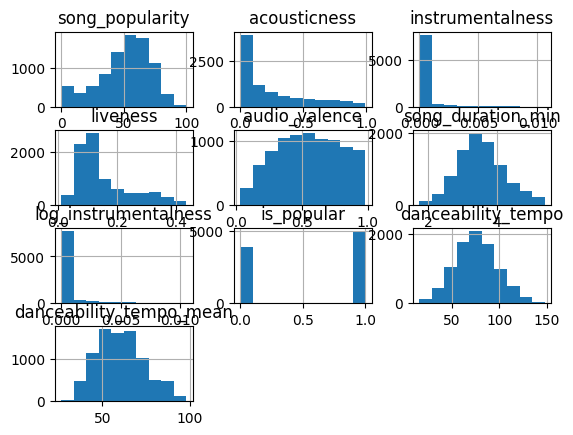

In [33]:
viz = dfMat[['song_popularity', 'acousticness',
       'instrumentalness', 'liveness',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_popular', 'key_1',
       'key_2', 'key_6','danceability_tempo','danceability_tempo_mean']]
viz.hist()
plt.show()

In [35]:
msk = np.random.rand(len(dfMat)) < 0.8
train = dfMat[msk]
test = dfMat[~msk]

In [36]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['acousticness',
       'instrumentalness', 'liveness',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_popular', 'key_1',
       'key_2', 'key_6','danceability_tempo','danceability_tempo_mean']]) 
y = np.asanyarray(train[['song_popularity']])

#linea para ajustar
regr.fit(x,y)

print('Coeficientes:', regr.coef_)

Coeficientes: [[ 2.32637516e-01  2.44092745e+05 -7.90870048e-01 -1.53810326e+00
  -1.65303334e-01 -2.45157792e+05  3.31189391e+01  9.57489855e-01
  -7.53566409e-01  3.58904978e-01  5.55992521e-02 -7.13218001e-02]]


In [37]:
y_hat = regr.predict(test[['acousticness',
       'instrumentalness', 'liveness',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_popular', 'key_1',
       'key_2', 'key_6','danceability_tempo','danceability_tempo_mean']])
x = np.asanyarray(test[['acousticness',
       'instrumentalness', 'liveness',
       'audio_valence', 'song_duration_min', 'log_instrumentalness',
       'is_popular', 'key_1',
       'key_2', 'key_6','danceability_tempo','danceability_tempo_mean']]) #MULTIPLE
y = np.asanyarray(test[['song_popularity']])

print('Error Residual Medio (RSE): %.2f' % np.mean((y_hat - y) ** 2))
print('Confianza: %.2f ' % regr.score(x,y))

Error Residual Medio (RSE): 151.03
Confianza: 0.64 


C:\Users\aguil\anaconda3\envs\nuevo\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [38]:

cv_scores = cross_val_score(regr, x, y, cv=5, scoring='r2')

print("R² en validación cruzada:", cv_scores)
print("Promedio de R² en validación cruzada:", np.mean(cv_scores))


R² en validación cruzada: [0.6472042  0.5621585  0.63854211 0.64442528 0.62312439]
Promedio de R² en validación cruzada: 0.6230908969405453


In [39]:
df = pd.DataFrame({'Valor Actual' : y.flatten(), 'Prediccion' : y_hat.flatten()})
df.head(10)

,Valor Actual,Prediccion
0,66,64.825275
1,81,66.657399
2,79,64.503605
3,77,64.809984
4,74,64.564179
5,74,64.855865
6,73,64.224146
7,60,64.344853
8,73,64.613155
9,71,61.753992


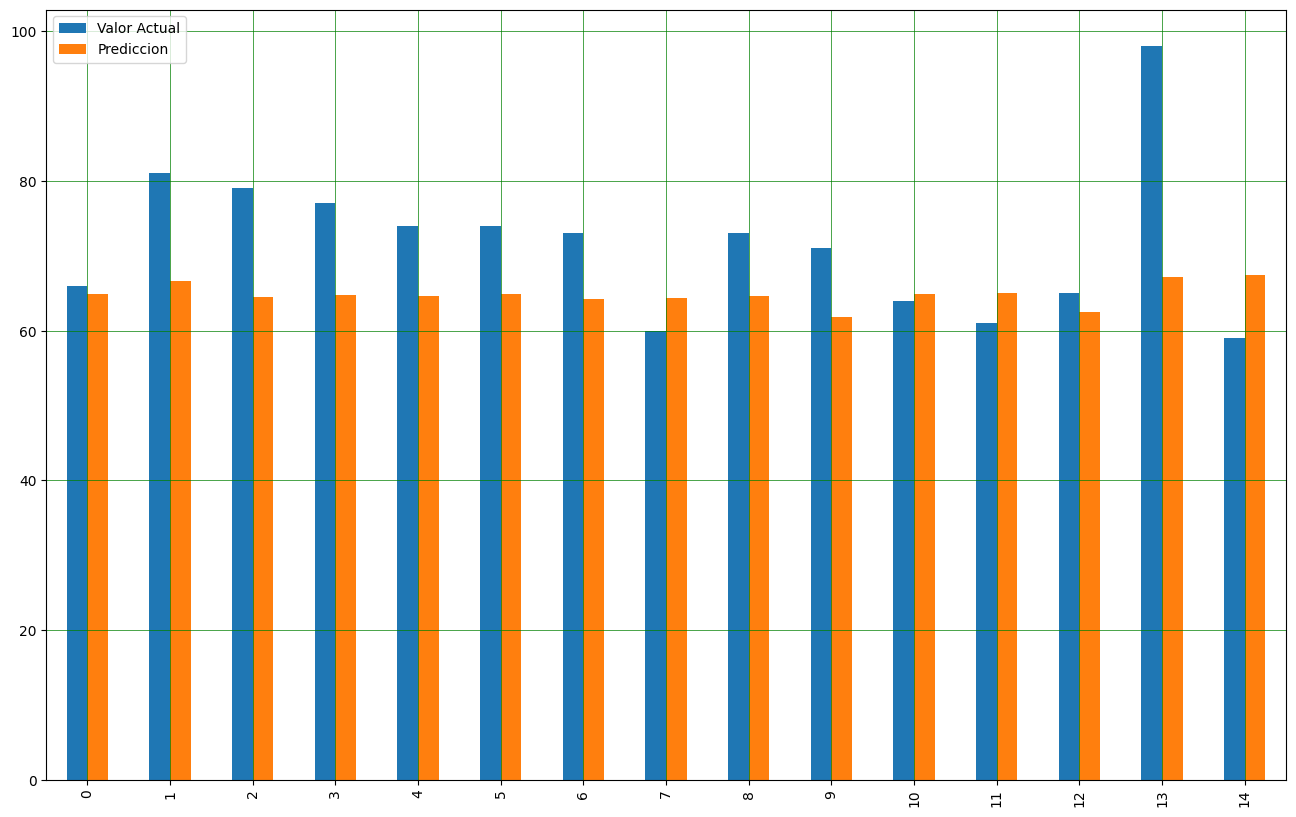

In [40]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()